In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()


In [13]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
#let check the dimension
df.shape

(569, 30)

In [15]:
# Let's scale the data first because variables have different scales
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(df)

scaled_data=scaler.transform(df)
scaled_data


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
from sklearn.decomposition import PCA


In [50]:
pca = PCA(n_components= 2) # we choose 2 PC to visualize the data

'''
- Compute the covariance matrix of the scaled data.
- Perform eigenvalue decomposition on the covariance matrix to find the eigenvalues and eigenvectors.
- Sort the eigenvectors by the magnitude of their corresponding eigenvalues in descending order.
- Select the top 2 eigenvectors (since n_components=2) to form the principal components.

'''
pca.fit(scaled_data)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
''' 
transform your data to the 2-dimensional space using pca.transform(scaled_data)
'''
x_pca = pca.transform(scaled_data)

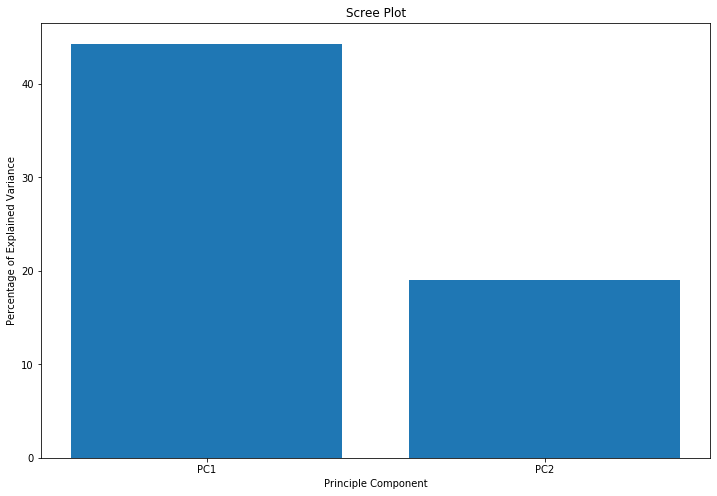

In [53]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(12,8))
plt.bar(x= range(1, len(per_var)+1), height=per_var, tick_label =labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principle Component")
plt.title("Scree Plot")
plt.show()

In [54]:
# Let's check the shape of new data

x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

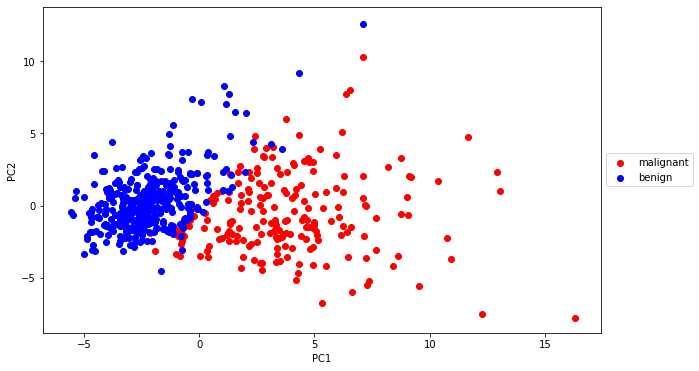

In [55]:
# Plot each class separately with labels
plt.figure(figsize=(10, 6))
for target, color, label in zip(np.unique(cancer['target']), ['red', 'blue'], cancer['target_names']):
    plt.scatter(x_pca[cancer['target'] == target, 0], 
                x_pca[cancer['target'] == target, 1], 
                c=color, 
                label=label)

# Add labels and legend
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


Text(0, 0.5, 'cumulative explained variance')

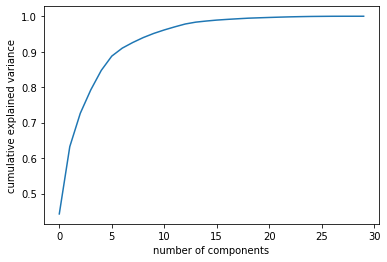

In [57]:
# Let's see how many PC needed to capture at least 95% of the variance

pca = PCA()

'''
- Compute the covariance matrix of the scaled data.
- Perform eigenvalue decomposition on the covariance matrix to find the eigenvalues and eigenvectors.
- Sort the eigenvectors by the magnitude of their corresponding eigenvalues in descending order.
- Select the top 2 eigenvectors (since n_components=2) to form the principal components.

'''
pca.fit(scaled_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

- Around 7 PCs would capture 95% of variation 